In [92]:
!pip install pandas numpy matplotlib scikit_learn seaborn

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv("Machine_Downtime.csv")

In [95]:
df.head(5)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [96]:
df = df.drop(['Date'], axis=1)

In [97]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing'] = df.isna().sum()
    summ['Missing %'] = df.isna().sum()/len(df)
    summ['Duplicates'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values

    display(summ)

    print(f"Data Shape: {df.shape}")

In [98]:
summary(df)

,Data Type,Missing,Missing %,Duplicates,Uniques,Count,Min,Max,Average,Standard Deviation
Machine_ID,object,0,0.0000,0,3,2500,NaN,NaN,NaN,NaN
Assembly_Line_No,object,0,0.0000,0,3,2500,NaN,NaN,NaN,NaN
Hydraulic_Pressure(bar),float64,10,0.0040,0,1977,2490,-14.326454,191.0,101.409084,30.289301
Coolant_Pressure(bar),float64,19,0.0076,0,1628,2481,0.325,11.35,4.947058,0.997357
Air_System_Pressure(bar),float64,17,0.0068,0,2472,2483,5.06348,7.973992,6.499275,0.407279
Coolant_Temperature,float64,12,0.0048,0,275,2488,4.1,98.2,18.559887,8.55448
Hydraulic_Oil_Temperature(?C),float64,16,0.0064,0,209,2484,35.2,61.4,47.618317,3.768674
Spindle_Bearing_Temperature(?C),float64,7,0.0028,0,204,2493,22.6,49.5,35.063698,3.764823
Spindle_Vibration(?m),float64,11,0.0044,0,1144,2489,-0.461,2.0,1.009334,0.342898
Tool_Vibration(?m),float64,11,0.0044,0,2350,2489,2.161,45.726,25.411975,6.437142


Data Shape: (2500, 15)


In [99]:
df.columns

Index(['Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
       'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)',
       'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [100]:
df['Machine_ID'].value_counts()

Machine_ID
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    808
Name: count, dtype: int64

In [101]:
df['Assembly_Line_No'].value_counts()

Assembly_Line_No
Shopfloor-L1    874
Shopfloor-L3    818
Shopfloor-L2    808
Name: count, dtype: int64

In [102]:
pd.crosstab(df["Machine_ID"], df["Assembly_Line_No"])

Assembly_Line_No,Shopfloor-L1,Shopfloor-L2,Shopfloor-L3
Machine_ID,,,
Makino-L1-Unit1-2013,874,0,0
Makino-L2-Unit1-2015,0,808,0
Makino-L3-Unit1-2015,0,0,818


In [103]:
df=df.drop(['Assembly_Line_No'],axis=1)

In [104]:
df['Machine_ID'] = df['Machine_ID'].replace({'Makino-L1-Unit1-2013':'M1','Makino-L2-Unit1-2015':'M2','Makino-L3-Unit1-2015':'M3'})

In [105]:
df['Machine_ID']

0       M1
1       M1
2       M3
3       M2
4       M1
        ..
2495    M1
2496    M1
2497    M2
2498    M3
2499    M2
Name: Machine_ID, Length: 2500, dtype: object

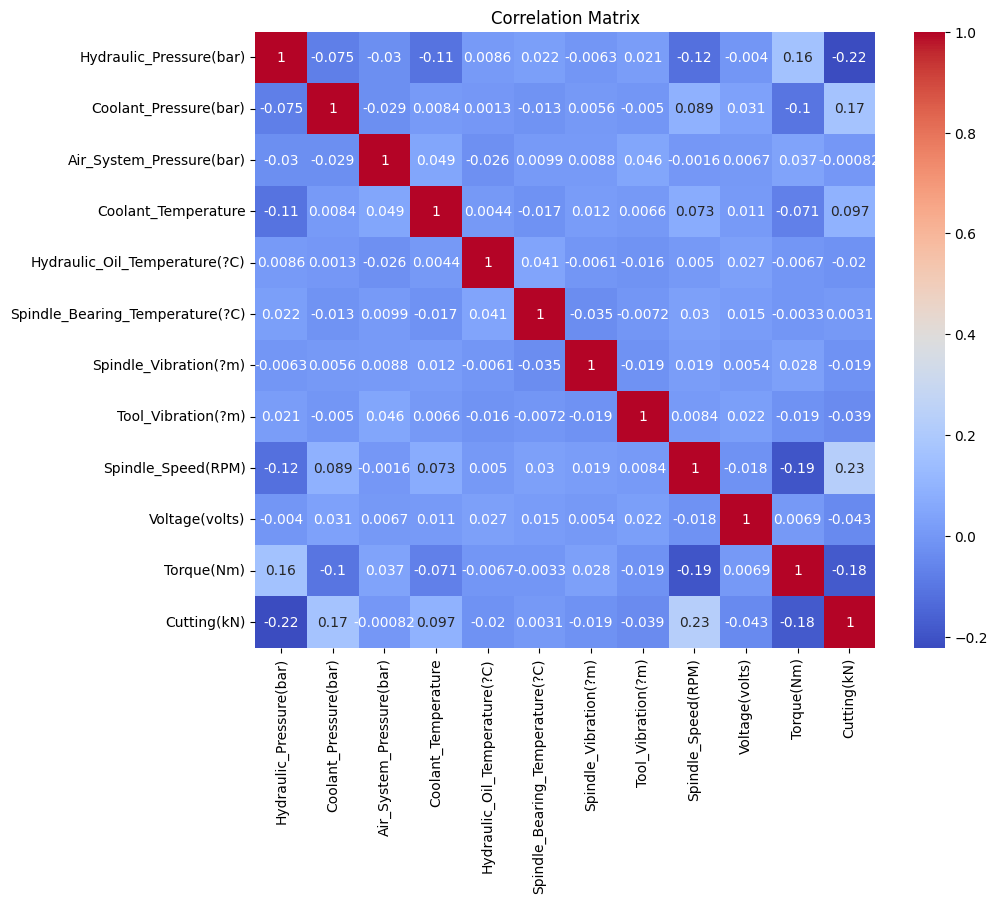

In [106]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [107]:
cols = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 
        'Air_System_Pressure(bar)', 'Coolant_Temperature', 
        'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)', 
        'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 
        'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

  Machine_ID            Downtime  Hydraulic_Pressure(bar)
0         M1     Machine_Failure                84.311876
1         M1  No_Machine_Failure               117.502630
2         M2     Machine_Failure                85.882525
3         M2  No_Machine_Failure               120.451104
4         M3     Machine_Failure                84.179542
5         M3  No_Machine_Failure               117.783962


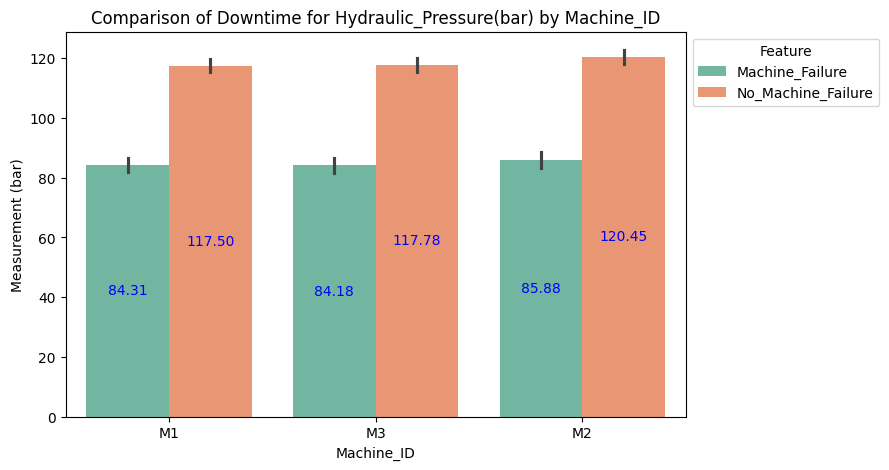

  Machine_ID            Downtime  Coolant_Pressure(bar)
0         M1     Machine_Failure               5.110872
1         M1  No_Machine_Failure               4.793980
2         M2     Machine_Failure               5.135535
3         M2  No_Machine_Failure               4.729804
4         M3     Machine_Failure               5.099617
5         M3  No_Machine_Failure               4.793034


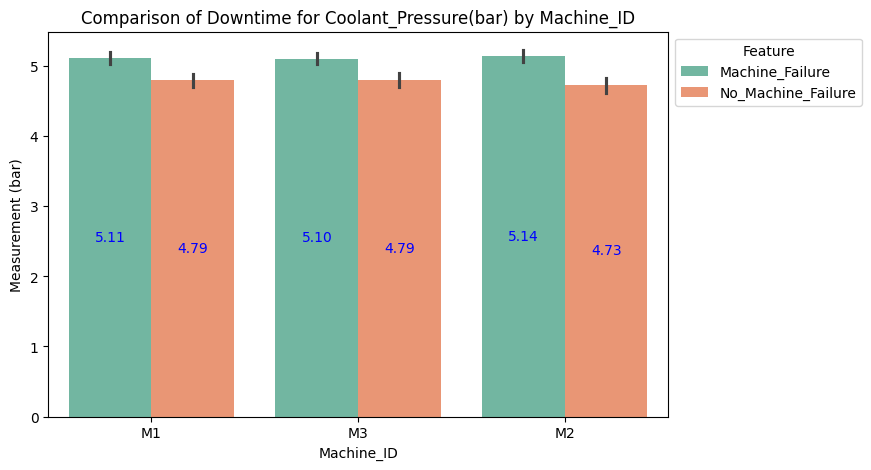

  Machine_ID            Downtime  Air_System_Pressure(bar)
0         M1     Machine_Failure                  6.505355
1         M1  No_Machine_Failure                  6.497938
2         M2     Machine_Failure                  6.513904
3         M2  No_Machine_Failure                  6.504623
4         M3     Machine_Failure                  6.490106
5         M3  No_Machine_Failure                  6.483592


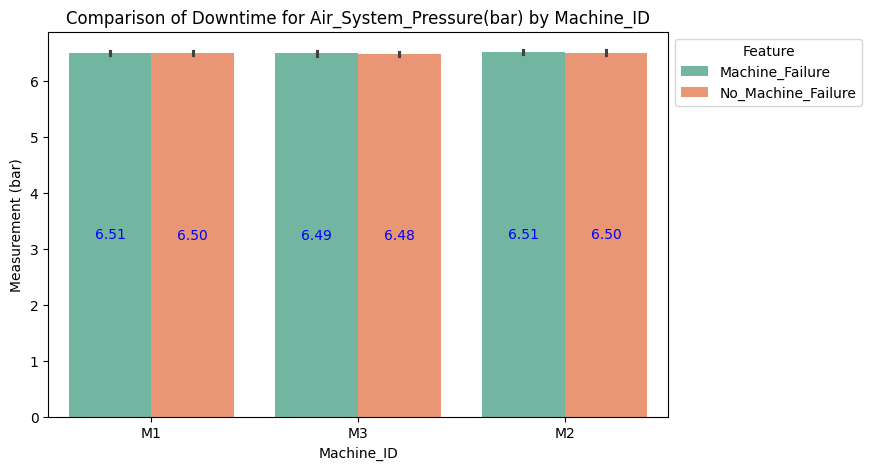

  Machine_ID            Downtime  Coolant_Temperature
0         M1     Machine_Failure            19.737445
1         M1  No_Machine_Failure            17.802638
2         M2     Machine_Failure            20.331566
3         M2  No_Machine_Failure            16.174693
4         M3     Machine_Failure            19.919277
5         M3  No_Machine_Failure            17.272180


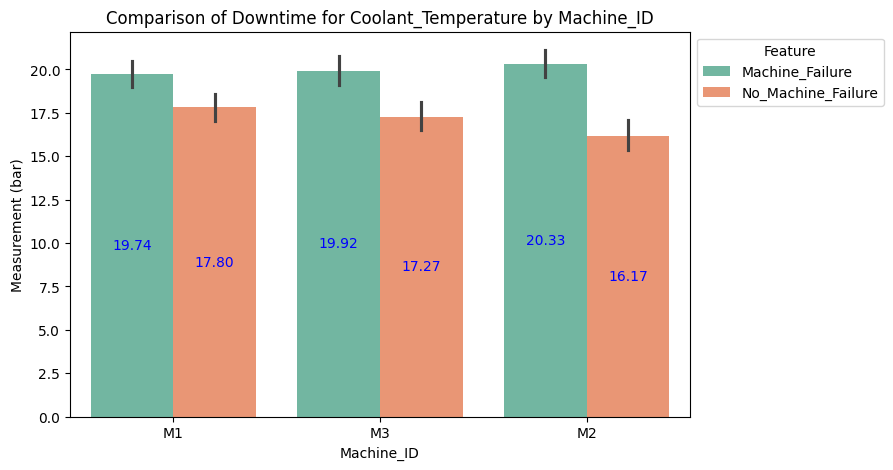

  Machine_ID            Downtime  Hydraulic_Oil_Temperature(?C)
0         M1     Machine_Failure                      47.479691
1         M1  No_Machine_Failure                      47.651683
2         M2     Machine_Failure                      47.584051
3         M2  No_Machine_Failure                      47.892402
4         M3     Machine_Failure                      47.659951
5         M3  No_Machine_Failure                      47.452000


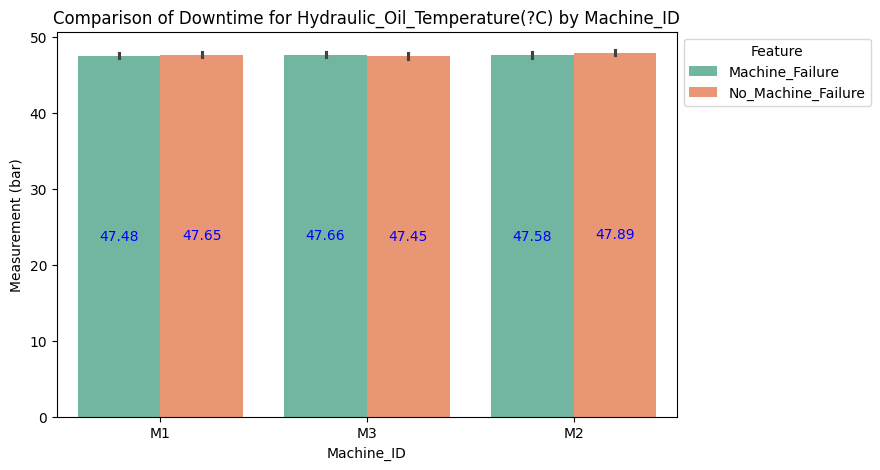

  Machine_ID            Downtime  Spindle_Bearing_Temperature(?C)
0         M1     Machine_Failure                        34.942070
1         M1  No_Machine_Failure                        35.100957
2         M2     Machine_Failure                        34.978481
3         M2  No_Machine_Failure                        34.967961
4         M3     Machine_Failure                        35.057729
5         M3  No_Machine_Failure                        35.351750


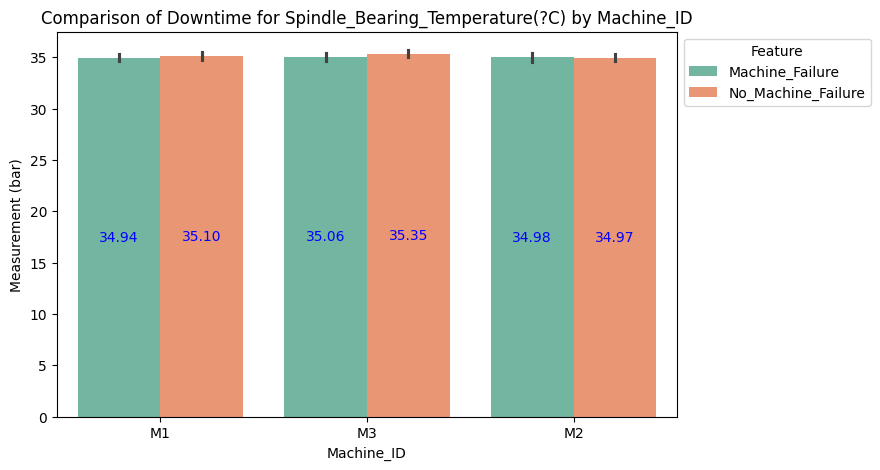

  Machine_ID            Downtime  Spindle_Vibration(?m)
0         M1     Machine_Failure               0.997208
1         M1  No_Machine_Failure               0.994591
2         M2     Machine_Failure               1.005226
3         M2  No_Machine_Failure               1.036015
4         M3     Machine_Failure               1.009311
5         M3  No_Machine_Failure               1.014960


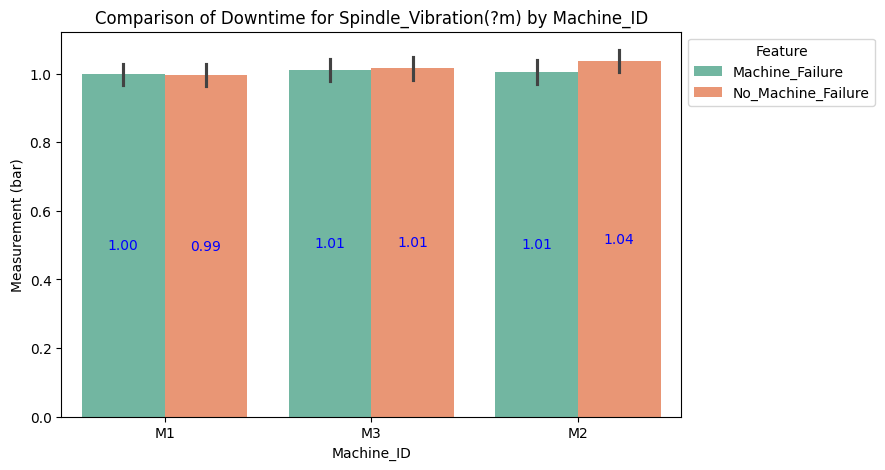

  Machine_ID            Downtime  Tool_Vibration(?m)
0         M1     Machine_Failure           25.052807
1         M1  No_Machine_Failure           25.595201
2         M2     Machine_Failure           25.448046
3         M2  No_Machine_Failure           25.377005
4         M3     Machine_Failure           25.654501
5         M3  No_Machine_Failure           25.374985


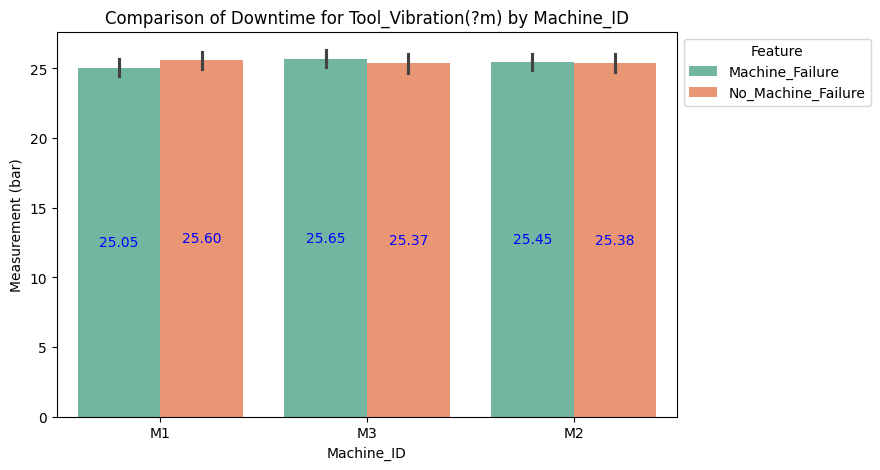

  Machine_ID            Downtime  Spindle_Speed(RPM)
0         M1     Machine_Failure        21446.132159
1         M1  No_Machine_Failure        19179.577566
2         M2     Machine_Failure        21362.270202
3         M2  No_Machine_Failure        19238.686275
4         M3     Machine_Failure        21139.732530
5         M3  No_Machine_Failure        19180.878109


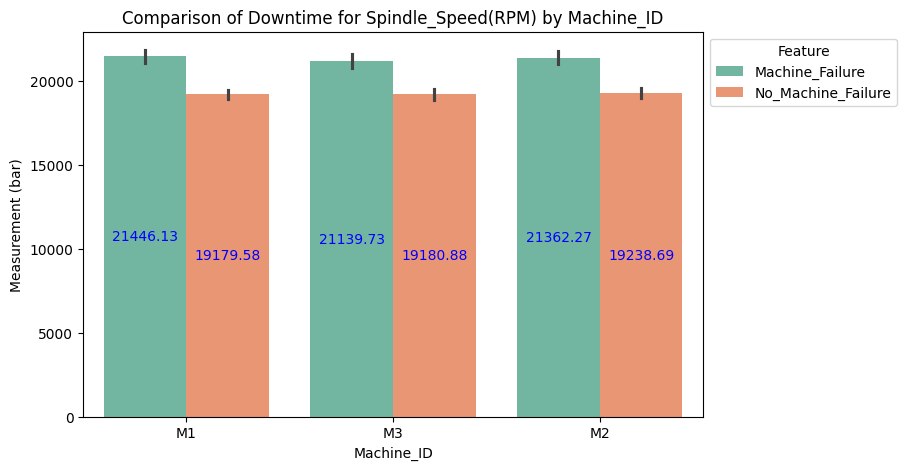

  Machine_ID            Downtime  Voltage(volts)
0         M1     Machine_Failure      349.323789
1         M1  No_Machine_Failure      349.510740
2         M2     Machine_Failure      349.550505
3         M2  No_Machine_Failure      345.290954
4         M3     Machine_Failure      348.908434
5         M3  No_Machine_Failure      351.413965


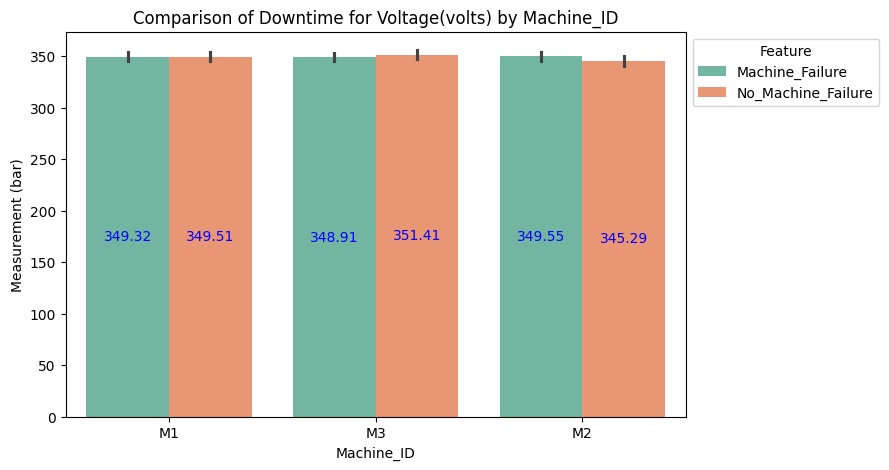

  Machine_ID            Downtime  Torque(Nm)
0         M1     Machine_Failure   22.587821
1         M1  No_Machine_Failure   27.499531
2         M2     Machine_Failure   22.615141
3         M2  No_Machine_Failure   27.710580
4         M3     Machine_Failure   23.088483
5         M3  No_Machine_Failure   28.131256


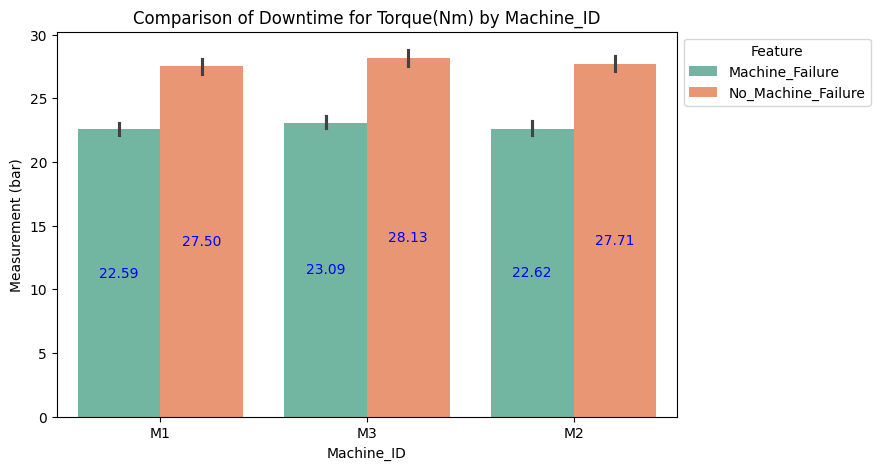

  Machine_ID            Downtime  Cutting(kN)
0         M1     Machine_Failure     3.044736
1         M1  No_Machine_Failure     2.481122
2         M2     Machine_Failure     3.078506
3         M2  No_Machine_Failure     2.519195
4         M3     Machine_Failure     3.048140
5         M3  No_Machine_Failure     2.504214


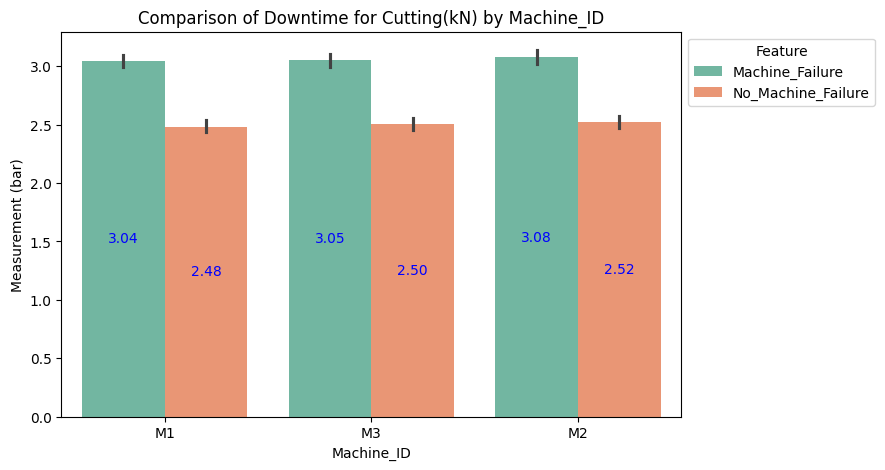

In [108]:
def cat_summary(dataframe, col_name, plot=False):
    print(dataframe.groupby(['Machine_ID','Downtime'])[[col_name]].mean().reset_index())

    if plot:
        fig, ax = plt.subplots(figsize=(8, 5))
        df_melted = dataframe.melt(id_vars=['Machine_ID','Downtime'], value_vars=[col_name], 
                           var_name='Feature', value_name='Measurement')
        sns.barplot(x='Machine_ID', y='Measurement', hue='Downtime', data=df_melted, palette='Set2')
        plt.title('Comparison of Downtime for ' + col_name + ' by Machine_ID')
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Feature')
        ax.bar_label(ax.containers[0], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        ax.bar_label(ax.containers[1], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        plt.xlabel('Machine_ID')
        plt.ylabel('Measurement (bar)')
        plt.show(block=True)
for col in cols:
    cat_summary(df, col, True)

In [109]:
df = df.dropna()

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [112]:
X = df.drop(['Downtime'], axis=1)

y = df['Downtime']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [115]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [116]:
y_pred = gbc.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9874


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       235
           1       0.98      1.00      0.99       242

    accuracy                           0.99       477
   macro avg       0.99      0.99      0.99       477
weighted avg       0.99      0.99      0.99       477



In [119]:
X_test.shape

(477, 13)

In [120]:
X_test.iloc[2].values

array([0.00000000e+00, 1.42360000e+02, 6.86394412e+00, 6.57680254e+00,
       5.50000000e+00, 4.77000000e+01, 3.16000000e+01, 6.27000000e-01,
       3.11070000e+01, 1.81900000e+04, 3.74000000e+02, 1.59007161e+01,
       3.59000000e+00])

In [121]:
test_1 = np.array(X_test.iloc[2]).reshape(1,-1)

In [122]:
pred = gbc.predict(test_1)
proba = gbc.predict_proba(test_1)

In [123]:
pred[0],proba[0][pred][0]

(0, 0.9987219762681591)

In [124]:
test_1

array([[0.00000000e+00, 1.42360000e+02, 6.86394412e+00, 6.57680254e+00,
        5.50000000e+00, 4.77000000e+01, 3.16000000e+01, 6.27000000e-01,
        3.11070000e+01, 1.81900000e+04, 3.74000000e+02, 1.59007161e+01,
        3.59000000e+00]])

In [125]:
df.columns

Index(['Machine_ID', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
       'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')